### Data Wrangling of USDA Fire Emissions Data Set (2003-2015)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, time

%matplotlib inline

In [22]:
# Load Emissions CSV File"
emdata = pd.read_csv('emissions_year2003to2015.csv')

In [23]:
# Use pandas to view the first 5 rows of the file
emdata.head(5)

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
0,0,2008,359,-81.0384,25.1958,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
1,1,2008,359,-81.0404,25.1984,4536,3,1600,62500.0,6220.097576,...,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,81,2,0
2,2,2008,359,-81.0380,25.1981,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
3,3,2008,359,-81.0331,25.1973,4536,95,0,62500.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,81,2,0
4,4,2008,359,-81.0594,25.2035,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0


In [24]:
# What are the dtypes of the columns
emdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254534 entries, 0 to 7254533
Data columns (total 22 columns):
id                     int64
year                   int64
doy                    int64
longitude              float64
latitude               float64
grid10k                int64
covertype              int64
fuelcode               int64
area_burned            float64
prefire_fuel           float64
consumed_fuel          float64
ECO2                   float64
ECO                    float64
ECH4                   float64
EPM2.5                 float64
cwd_frac               float64
duff_frac              float64
fuel_moisture_class    int64
burn_source            int64
burnday_source         int64
BSEV                   int64
BSEV_flag              int64
dtypes: float64(11), int64(11)
memory usage: 1.2 GB


In [25]:
# How many rows and columns is the dataset?
emdata.shape

(7254534, 22)

In [26]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emdata.shape))

7254534 instances with 22 features



In [27]:
# Checking to see that all years were combined to file
print(emdata['year'].unique())

[2008 2009 2013 2007 2006 2012 2004 2010 2011 2005 2015 2014 2003]


In [28]:
# Checking for null values
emdata.isnull().sum()

id                     0
year                   0
doy                    0
longitude              0
latitude               0
grid10k                0
covertype              0
fuelcode               0
area_burned            0
prefire_fuel           0
consumed_fuel          0
ECO2                   0
ECO                    0
ECH4                   0
EPM2.5                 0
cwd_frac               0
duff_frac              0
fuel_moisture_class    0
burn_source            0
burnday_source         0
BSEV                   0
BSEV_flag              0
dtype: int64

In [9]:
# Removing select columns that are not necessary per earlier team discussion
emdata = emdata.drop(['grid10k', 'BSEV_flag', 'burnday_source'], 1)

In [10]:
# Verify the three columns were dropped
emdata.shape

(7254534, 19)

In [11]:
# Removing the rows with Zero values across Prefire Fuel, Consumed Fuel Mass and ECO2
do = emdata[(emdata.prefire_fuel == 0)]
do2 = do['prefire_fuel'].value_counts()
eo = emdata[(emdata.consumed_fuel == 0)]
eo2 = do['consumed_fuel'].value_counts()
fo = emdata[(emdata.ECO2 == 0)]
fo2 = fo['ECO2'].value_counts()

print(do2)
print(eo2)
print(fo2)

0.0    1293962
Name: prefire_fuel, dtype: int64
0.0    1293962
Name: consumed_fuel, dtype: int64
0.0    1293962
Name: ECO2, dtype: int64


In [12]:
indexNames = emdata[(emdata.prefire_fuel == 0) & (emdata.consumed_fuel == 0) & (emdata.ECO2 == 0)].index
emdata.drop(indexNames , inplace=True)

In [13]:
# Use pandas to get the summary statistics on the data
emdata.describe()

,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,BSEV
count,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06,5.960572e+06
mean,1.128901e+07,2.009305e+03,1.730708e+02,-1.050490e+02,3.803980e+01,2.189173e+00,6.283838e+02,4.992622e+04,2.947503e+03,1.842402e+03,2.965052e+03,1.962275e+02,9.460753e+00,3.243165e+01,5.998773e-02,7.683271e-02,2.216377e+00,1.449038e+00,2.101838e+00
std,3.113785e+07,3.499761e+00,7.387169e+01,1.257917e+01,5.574091e+00,8.418228e-01,6.976638e+02,2.505517e+04,2.960848e+03,1.767418e+03,2.802989e+03,2.214744e+02,1.252737e+01,3.798760e+01,1.023220e-01,1.071232e-01,7.528200e-01,9.094067e-01,7.947994e-01
min,0.000000e+00,2.003000e+03,0.000000e+00,-1.246583e+02,2.468010e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.810924e+00,3.544159e+00,5.943555e+00,2.480910e-01,9.498000e-03,3.615000e-02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.474968e+05,2.006000e+03,1.050000e+02,-1.158255e+02,3.353190e+01,1.000000e+00,1.000000e+00,6.250000e+04,2.560044e+02,2.324552e+02,3.898273e+02,1.627186e+01,6.229800e-01,2.371043e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
50%,3.126210e+05,2.009000e+03,1.880000e+02,-1.072852e+02,3.753470e+01,2.000000e+00,2.000000e+00,6.250000e+04,1.470120e+03,1.251245e+03,1.969832e+03,9.266699e+01,3.547822e+00,1.350290e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
75%,5.828092e+05,2.012000e+03,2.270000e+02,-9.629230e+01,4.274970e+01,3.000000e+00,1.220000e+03,6.250000e+04,6.424431e+03,3.569616e+03,5.728583e+03,2.958688e+02,1.087070e+01,4.572518e+01,9.194700e-02,1.543580e-01,3.000000e+00,1.000000e+00,2.000000e+00
max,1.494107e+08,2.015000e+03,3.660000e+02,-6.700630e+01,4.900280e+01,3.000000e+00,2.950000e+03,6.250000e+04,1.333751e+04,1.047759e+04,1.628218e+04,1.393520e+03,7.837240e+01,2.388891e+02,4.970340e-01,8.003240e-01,4.000000e+00,4.000000e+00,4.000000e+00


In [14]:
# Remove zero value features noted during previous data reviews 
indexNames = emdata[(emdata.prefire_fuel == 0) & (emdata.consumed_fuel == 0) & (emdata.ECO2 == 0)].index
emdata.drop(indexNames , inplace=True)

In [15]:
# How many rows and columns in the revised dataset?
emdata.shape

(5960572, 19)

In [16]:
# What are the largest areas burned?
emdata.sort_values(by='area_burned', ascending=False).head(10)

,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,BSEV
7254533,434647,2003,219,-121.9887,48.5002,3,1200,62500.0,6424.431099,4040.568775,6279.043877,537.395647,30.223454,92.124968,0.236728,0.198929,3,4,3
6348740,24234157,2014,238,-122.5726,43.7428,3,1200,62500.0,6424.431099,3833.490246,5957.243842,509.854203,28.674507,87.403578,0.308820,0.242211,2,1,2
6348743,24234160,2014,237,-122.5636,43.7446,3,1200,62500.0,6424.431099,3833.490246,5957.243842,509.854203,28.674507,87.403578,0.308820,0.242211,2,1,2
3866160,565,2010,112,-81.0668,25.6804,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866159,564,2010,112,-81.0693,25.6807,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866158,563,2010,112,-81.0717,25.6811,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866157,562,2010,112,-81.0741,25.6814,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866156,561,2010,112,-81.0766,25.6818,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866155,560,2010,112,-81.0790,25.6821,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2
3866154,559,2010,112,-81.0814,25.6825,3,1600,62500.0,6220.097576,2041.374340,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,2


In [17]:
# what does the Burn Severity (BSEV) look like - with the rankings from 1 (low) to 4 (highest)?
emdata['BSEV'].value_counts()

2    3366114
1    1199132
3     984430
4     410877
0         19
Name: BSEV, dtype: int64

In [18]:
# What does the fuel code look like? Check how many unique values there are.
emdata['fuelcode'].value_counts()

1       1654890
2       1523213
1500     386969
1140     342021
1200     323936
1220     320896
1160     276662
1180     223461
1260     197818
1370     165640
1920     122231
1600     110018
1280     105916
1400      68147
2700      28381
2900      15624
1360      14728
1900      14508
2180      12468
1950      10502
1800       8188
1940       7317
1100       6851
1120       5671
2950       4849
1320       3306
1300       2704
1340       2315
1980        667
1700        290
1910        257
1240        116
1990         12
Name: fuelcode, dtype: int64

In [30]:
emdata.groupby('fuelcode')['BSEV'].mean().head()

fuelcode
0       0.398000
1       1.980207
2       2.129119
1100    2.461684
1120    2.788044
Name: BSEV, dtype: float64

In [31]:
emdata2 = emdata.groupby('fuelcode')['BSEV'].mean()
emdata2.head()

fuelcode
0       0.398000
1       1.980207
2       2.129119
1100    2.461684
1120    2.788044
Name: BSEV, dtype: float64

In [32]:
emdata3 = emdata.groupby('fuelcode')['BSEV'].max().sort_values(ascending = False)
emdata3.head()

fuelcode
0       6
1200    4
1320    4
1300    4
1280    4
Name: BSEV, dtype: int64

In [33]:
# What about mean age by sex and pclass?
emdata.groupby(['BSEV']).fuelcode.mean()

BSEV
0       0.020029
1     708.194057
2     511.067241
3     650.294260
4    1010.590308
5       0.000000
6       0.000000
Name: fuelcode, dtype: float64

In [34]:
emdata[['cwd_frac', 'duff_frac']].agg(['mean','min','max'])

,cwd_frac,duff_frac
mean,0.049288,0.063128
min,0.000000,0.000000
max,0.497034,0.800324


In [35]:
# Check if there are any empty/missing values from the csv that would cause errors when we run the scikit-learn tools
emdata.isnull().values.any()

False

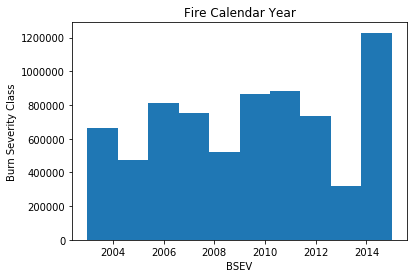

In [36]:
# Visualize the BSEV distribution by year
fig, ax = plt.subplots()
ax.hist(emdata['year'], bins=10, range = (emdata['year'].min(),emdata['year'].max()))
plt.title('Fire Calendar Year')
plt.xlabel('BSEV')
plt.ylabel('Burn Severity Class')
plt.show()